In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import sklearn
import os, sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB;
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("http://storage.googleapis.com/download.tensorflow.org/data/heart.csv")
df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [ ]:
print(df["target"])

0      0
1      1
2      0
3      0
4      0
      ..
298    0
299    1
300    1
301    1
302    1
Name: target, Length: 303, dtype: int64


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

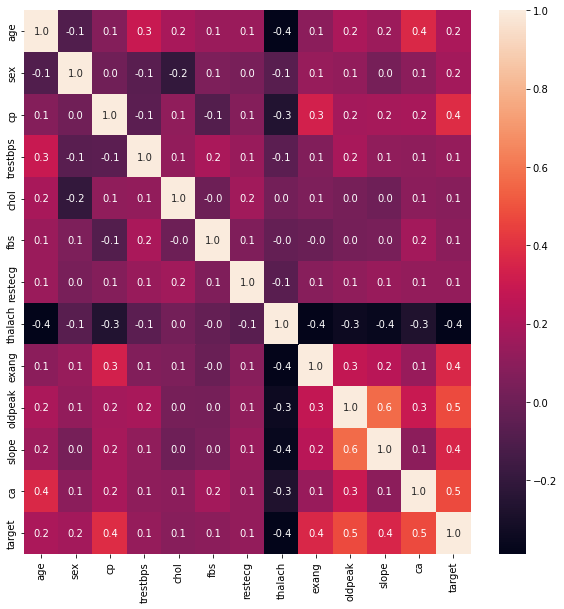

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


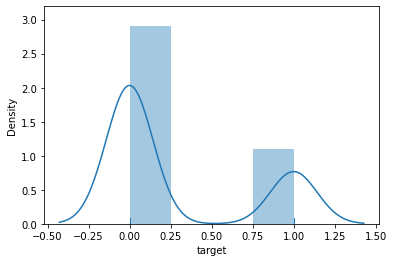

In [ ]:
sns.distplot(df['target'],rug=True)
plt.show()

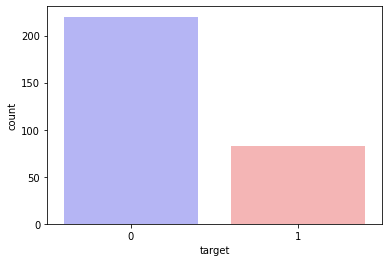

In [ ]:
sns.countplot(x='target',data=df,palette="bwr")
plt.show()

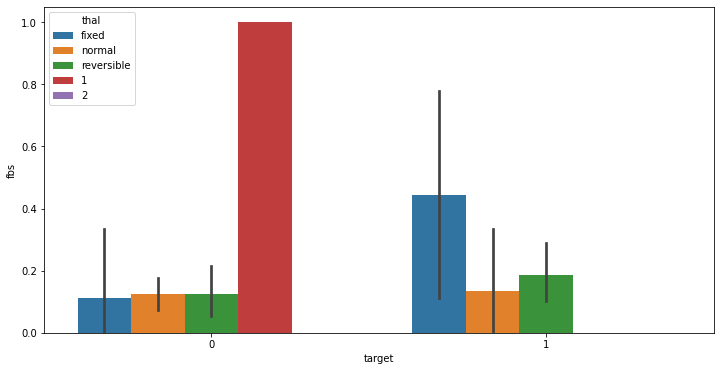

In [ ]:
plt.figure(num=None,figsize=(12,6))

sns.barplot(x='target',y='fbs',hue="thal",data=df)
plt.show()

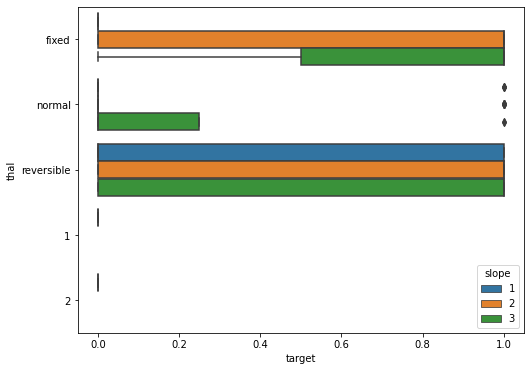

In [ ]:
plt.figure(num=None,figsize=(8,6))
sns.boxplot(x='target',y='thal',hue='slope',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


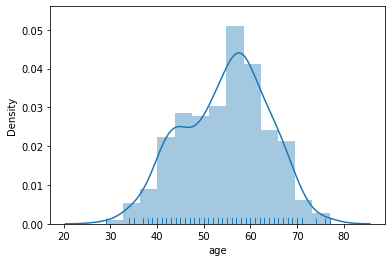

In [ ]:
sns.distplot(df['age'],rug=True)
plt.show()

In [ ]:
min_age=min(df.age)
max_age=max(df.age)
mean_age=df.age.mean()

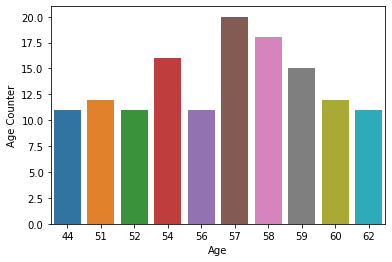

In [ ]:
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.show()

In [ ]:
df.sex.value_counts()

1    205
0     98
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


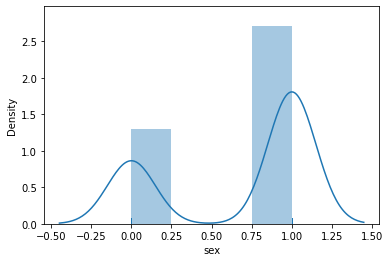

In [ ]:
sns.distplot(df['sex'],rug=True)
plt.show()

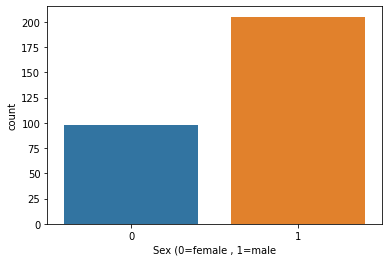

In [ ]:
sns.countplot(x="sex",data=df)
plt.xlabel("Sex (0=female , 1=male")
plt.show()

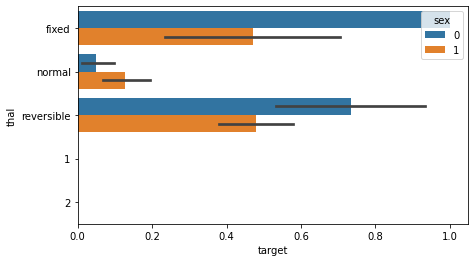

In [ ]:
plt.figure(num=None ,figsize=(7,4))
sns.barplot(y='thal',x='target',hue='sex',data=df)
plt.show()

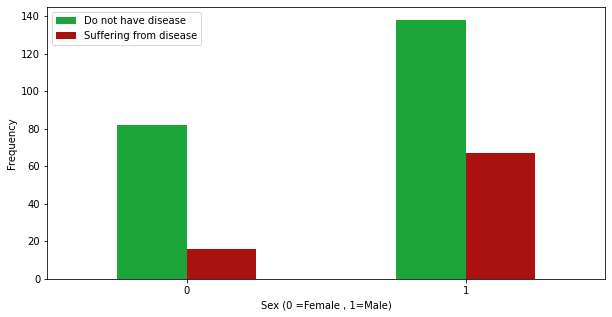

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['#1CA538','#AA1111'])
plt.xlabel('Sex (0 =Female , 1=Male)')
plt.xticks(rotation=0)
plt.legend(["Do not have disease", "Suffering from disease"])
plt.ylabel("Frequency")
plt.show()
#in the output shown we explain the total count of people having the disease and not having the disease

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


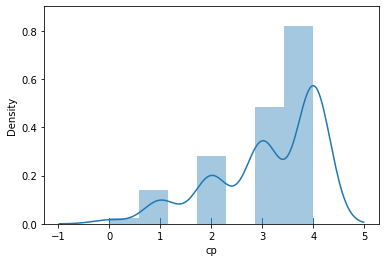

In [ ]:
sns.distplot(df['cp'],rug=True)
plt.show()

In [ ]:
df.target.value_counts()

0    220
1     83
Name: target, dtype: int64

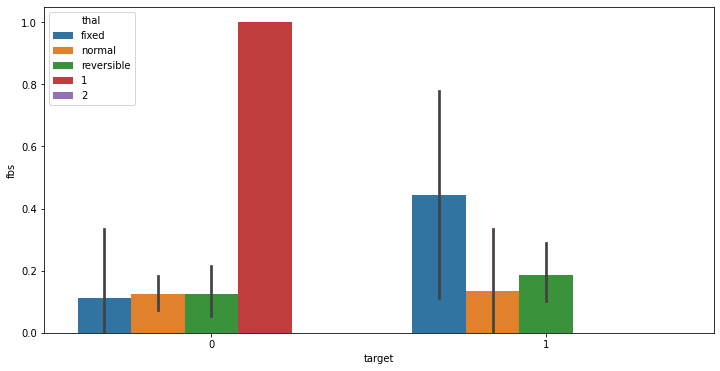

In [ ]:
plt.figure(num=None,figsize=(12,6))
sns.barplot(x='target',y='fbs',hue='thal',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


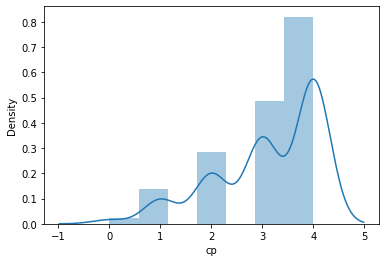

In [ ]:
sns.distplot(df['cp'])

In [ ]:
### thalch: Maximum heart rate achieved

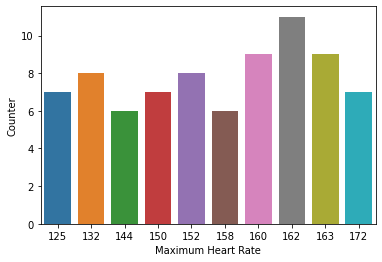

In [ ]:
sns.barplot(x=df.thalach.value_counts()[:10].index,y=df.thalach.value_counts()[:10].values)
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Counter")
plt.show()

In [ ]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
frames=[df,sp,th]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal'],axis=1,inplace=True)

In [ ]:
df.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_3,cp_4,slope_1,slope_2,slope_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
0,63,1,145,233,1,2,150,0,2.3,0,...,0,0,0,0,1,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,3,...,0,1,0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,...,0,1,0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,0,...,1,0,0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,0,...,0,0,1,0,0,0,0,0,1,0


Feature Selection

In [ ]:
X=df.drop(['target'],axis=1)
y=df.target.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

LOGISTIC REGRESSION ALGORITHM

In [ ]:
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test,lr_pred)

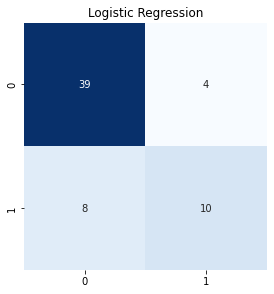

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [ ]:
print('Logistic Regression_Accuracy: ',lr_ac)

Logistic Regression_Accuracy:  0.8032786885245902


LINEAR REGRESSION MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [62]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
regressor.score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error:  0.23602334605088887
Mean Squared Error:  0.09595513615348995
Root Mean Squared Error:  0.30976626051506956


K MEANS ALGORITHM

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
Nc=range(1,20)
kmeans=[KMeans(n_clusters=i) for i in Nc]

In [ ]:
score=[kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

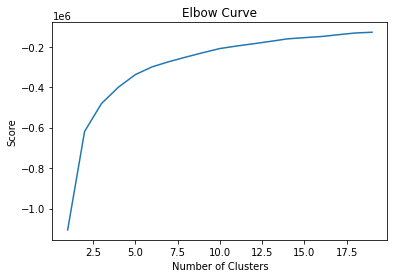

In [ ]:
import pylab as pl
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [61]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(df)
y_pred1=kmeans.predict(X_test)
print(y_pred1)

[0 3 0 4 3 3 0 1 3 0 0 1 0 0 4 2 3 0 1 0 4 1 4 1 0 3 0 3 1 1 3 1 0 3 3 4 4
 0 3 1 4 3 0 3 4 1 1 3 3 1 0 4 4 3 3 3 3 4 1 0 4 3 3 3 0 1 0 3 1 1 1 1 3 4
 3 3 1 1 3 3 4 4 1 3 3 4 4 4 0 4 0 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 3 0 1 1 3
 1 0 0 0 4 0 1 3 4 1 3]


In [ ]:
len(kmeans.labels_)

303

In [ ]:
df['cluster'] = kmeans.labels_

In [ ]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_4,slope_1,slope_2,slope_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible,cluster
0,63,1,145,233,1,2,150,0,2.3,0,...,0,0,0,1,0,0,1,0,0,2
1,67,1,160,286,0,2,108,1,1.5,3,...,1,0,1,0,0,0,0,1,0,0
2,67,1,120,229,0,2,129,1,2.6,2,...,1,0,1,0,0,0,0,0,1,0
3,37,1,130,250,0,0,187,0,3.5,0,...,0,0,0,1,0,0,0,1,0,2
4,41,0,130,204,0,2,172,0,1.4,0,...,0,1,0,0,0,0,0,1,0,3


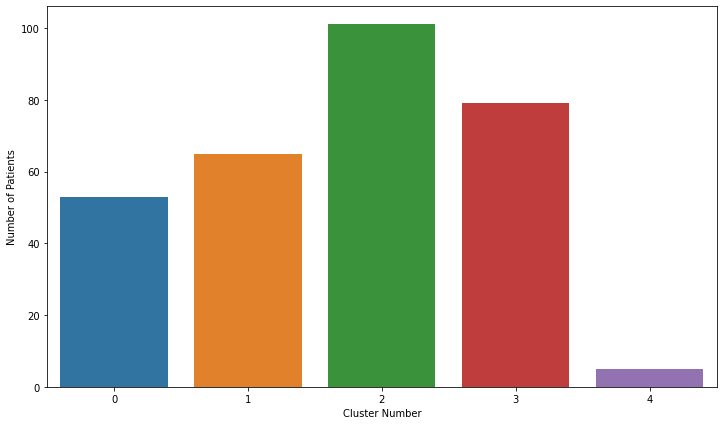

In [ ]:
##Interpretting Clustering Results
plt.figure(figsize=(12,7))
axis=sns.barplot(x=np.arange(0,5,1),y=df.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Patients")

In [ ]:
df.groupby(['cluster']).mean()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_3,cp_4,slope_1,slope_2,slope_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
cluster,,,,,,,,,,,,,,,,,,,,,
0,59.566038,0.735849,135.320755,256.660377,0.113208,1.132075,121.924528,0.528302,1.460377,0.849057,...,0.169811,0.622642,0.245283,0.660377,0.094340,0.000000,0.000000,0.075472,0.396226,0.528302
1,56.276923,0.584615,137.646154,306.769231,0.169231,1.138462,152.353846,0.369231,1.041538,0.830769,...,0.246154,0.507692,0.523077,0.415385,0.061538,0.000000,0.000000,0.030769,0.569231,0.400000
2,51.108911,0.683168,127.990099,238.059406,0.138614,0.871287,164.524752,0.188119,0.728713,0.534653,...,0.356436,0.356436,0.574257,0.366337,0.059406,0.000000,0.009901,0.029703,0.653465,0.306931
3,53.822785,0.746835,129.189873,188.936709,0.164557,0.860759,144.886076,0.341772,1.168354,0.607595,...,0.265823,0.468354,0.493671,0.430380,0.075949,0.012658,0.000000,0.113924,0.531646,0.341772
4,62.600000,0.000000,135.800000,438.200000,0.200000,2.000000,155.600000,0.200000,1.900000,1.200000,...,0.400000,0.600000,0.200000,0.800000,0.000000,0.000000,0.000000,0.000000,0.400000,0.600000


In [ ]:
size_array = list(df.groupby(['cluster']).count()['age'].values)

In [ ]:
size_array

[53, 65, 101, 79, 5]

In [ ]:
df[df['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_4,slope_1,slope_2,slope_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible,cluster
260,65,0,140,417,1,2,157,0,0.8,1,...,0,1,0,0,0,0,0,1,0,4
129,56,0,134,409,0,2,150,1,1.9,2,...,1,0,1,0,0,0,0,0,1,4
101,67,0,115,564,0,2,160,0,1.6,0,...,0,0,1,0,0,0,0,0,1,4
121,62,0,140,394,0,2,157,0,1.2,0,...,1,0,1,0,0,0,0,1,0,4
302,63,0,150,407,0,2,154,0,4.0,3,...,1,0,1,0,0,0,0,0,1,4
